# Mini-Projet TP - Apprentissage Automatique

**Nom:** [Kheyri]
**Prénom:** [Ahmedou Yahye]
**Section:** MRI1
**Année Universitaire:** 2024-2025

---

Ce notebook présente un projet de comparaison de trois méthodes de classification (KPPV, MLP, SVM) sur l'ensemble de données `heart-disease.csv`, en suivant les étapes de préparation des données, apprentissage, évaluation des performances et synthèse.

Le travail est structuré en 4 parties principales, conformément aux exigences du projet.

---
## Installation des bibliothèques necessaires pour le pretretement

- python -m venv .venv
- .venv\Scripts\activate
- pip install pandas scikit-learn matplotlib "numpy<2" seaborn jupyter



## Partie 1: Préparation du Dataset

Cette section couvre les étapes nécessaires pour charger, explorer et préparer les données du dataset `heart-disease.csv` pour l'entraînement des modèles d'apprentissage automatique. Cela inclut l'importation, la vérification, la gestion des variables qualitatives (encodage), la mise à l'échelle des caractéristiques, et le partitionnement des données en ensembles d'entraînement et de test.

In [2]:
# --- PARTIE 1: Préparation du Dataset ---

# Importation des bibliothèques nécessaires
import pandas as pd                     # Utilisé pour la manipulation et l'analyse de données, notamment les DataFrames.
import numpy as np                      # Fournit un support pour les grands tableaux et matrices multidimensionnels, ainsi qu'une collection de fonctions mathématiques de haut niveau pour agir sur ces tableaux.
from sklearn.model_selection import train_test_split # Fonction pour diviser les ensembles de données en sous-ensembles aléatoires d'entraînement et de test.
from sklearn.preprocessing import StandardScaler    # Transformateur pour standardiser les caractéristiques en supprimant la moyenne et en mettant à l'échelle à la variance unitaire.
from sklearn.preprocessing import OneHotEncoder     # Transformateur pour encoder les caractéristiques catégorielles nominales en utilisant un schéma one-hot ou one-of-K.
from sklearn.compose import ColumnTransformer     # Classe pour appliquer différents transformateurs à différentes colonnes de données.
from sklearn.pipeline import Pipeline               # Utilitaire pour créer des pipelines de flux de travail d'apprentissage automatique.

# Définir le nom du fichier de données
# Nous utilisons 'heart-disease.csv' comme spécifié par l'utilisateur et confirmé à partir des snippets.
# Assurez-vous que ce fichier se trouve dans le même répertoire que ce notebook VS Code,
# ou spécifiez le chemin complet du fichier pour éviter les erreurs FileNotFoundError.
dataset_filename = 'heart-disease.csv'

# 1. Importation du Dataset
print(f"Attempting to load dataset: {dataset_filename}")
try:
    # Lecture du fichier CSV dans un DataFrame pandas.
    df = pd.read_csv(dataset_filename)
    print(f"Dataset '{dataset_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"Erreur : Le fichier de données '{dataset_filename}' est introuvable.")
    print("Veuillez vous assurer que le fichier est dans le bon répertoire ou spécifiez le chemin complet.")
    df = None # Initialiser df à None pour gérer l'erreur dans la suite du code
except Exception as e:
    # Gérer d'autres exceptions potentielles lors du chargement du fichier.
    print(f"Une erreur s'est produite lors du chargement du dataset : {e}")
    df = None


# Vérifier si le dataframe a été chargé avec succès avant de continuer les étapes de préparation.
if df is not None:
    # 2. Vérification des données du dataset
    print("\n--- Informations générales sur le Dataset ---")
    # df.info() affiche un résumé concis du DataFrame, incluant le nombre d'entrées,
    # le type de données de chaque colonne (int64, float64, object, etc.),
    # le nombre de valeurs non nulles, et l'utilisation de la mémoire.
    df.info()

    print("\n--- Les 5 premières lignes du dataset ---")
    # df.head() affiche les 5 premières lignes du DataFrame. Utile pour avoir un aperçu
    # de la structure des données et des premières observations.
    print(df.head())

    print("\n--- Statistiques descriptives du dataset ---")
    # df.describe() génère des statistiques descriptives pour les colonnes numériques.
    # Cela inclut le compte, la moyenne, l'écart type, les valeurs minimale et maximale,
    # ainsi que les quartiles (25%, 50% - médiane, 75%).
    print(df.describe())

    print("\n--- Vérification des valeurs manquantes ---")
    # df.isnull() retourne un DataFrame de booléens indiquant si chaque élément est NaN (Not a Number).
    # .sum() additionne les True (qui sont traités comme 1) pour chaque colonne, donnant le nombre total de valeurs manquantes par colonne.
    print(df.isnull().sum())
    # Si des valeurs manquantes sont trouvées, des étapes de gestion des valeurs manquantes (imputation, suppression de lignes/colonnes)
    # seraient nécessaires ici, mais d'après la description commune de ce dataset, il est souvent propre.


    # Séparer les caractéristiques (X) et la variable cible (y)
    # La variable cible pour le dataset heart-disease.csv est nommée 'target' dans le snippet fourni par l'utilisateur.
    # df.drop('target', axis=1) crée un nouveau DataFrame en supprimant la colonne 'target'. axis=1 spécifie que l'on retire une colonne.
    X = df.drop('target', axis=1)
    # Sélection de la colonne 'target' comme variable cible.
    y = df['target']

    # 3. Répartition des classes
    print("\n--- Distribution de la variable cible ('target') ---")
    # value_counts() calcule la fréquence d'apparition de chaque valeur unique dans la colonne 'target'.
    print(y.value_counts())
    # CORRECTION DE L'ERREUR : Imprimer la distribution en pourcentage directement.
    # Le calcul y.value_counts(normalize=True) * 100 renvoie une Série pandas.
    # Tenter de formater toute la Série avec ":.2f%" dans une f-string cause le TypeError.
    # Imprimer la Série directement permet à pandas de gérer l'affichage.
    print("Distribution des classes en pourcentage:")
    print(y.value_counts(normalize=True) * 100)
    # Ajouter un commentaire pour mieux comprendre l'équilibre des classes.
    # Une distribution équilibrée (proche de 50/50) est souhaitable pour la classification ; sinon, des techniques de gestion du déséquilibre (suréchantillonnage, sous-échantillonnage) pourraient être envisagées.


    # 4. Encoder les variables qualitatives
    # 5. Feature scaling

    # Identification des colonnes selon leur type pour appliquer les transformations appropriées.
    # Basé sur la description commune du dataset heart-disease.csv et le snippet :
    # Variables considérées comme catégorielles ou discrètes nécessitant un encodage One-Hot :
    # 'sex', 'cp' (type de douleur thoracique), 'fbs' (glycémie à jeun), 'restecg' (résultats ECG),
    # 'exang' (angine induite par l'exercice), 'slope' (pente du segment ST), 'ca' (nombre de vaisseaux colorés),
    # 'thal' (type de thalassémie).
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    # Variables considérées comme numériques continues nécessitant une mise à l'échelle :
    # 'age', 'trestbps' (pression artérielle au repos), 'chol' (cholestérol),
    # 'thalach' (fréquence cardiaque maximale), 'oldpeak' (dépression du ST).
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # Création des transformateurs pour les types de caractéristiques.
    # StandardScaler: Standardise les caractéristiques numériques (rend leur moyenne nulle et leur variance unitaire).
    numerical_transformer = StandardScaler()
    # OneHotEncoder: Convertit chaque variable catégorielle en plusieurs colonnes binaires (une par catégorie unique).
    # handle_unknown='ignore': Gère les catégories qui pourraient apparaître dans l'ensemble de test mais pas dans l'ensemble d'entraînement en les ignorant (les nouvelles colonnes seront toutes à zéro).
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Création d'un ColumnTransformer pour appliquer les transformateurs aux colonnes appropriées du DataFrame.
    # Le paramètre `transformers` est une liste de tuples: ('nom_transformateur', transformateur, liste_de_colonnes).
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features), # Applique StandardScaler aux colonnes numériques
            ('cat', categorical_transformer, categorical_features)]) # Applique OneHotEncoder aux colonnes catégorielles

    # Création d'un Pipeline pour enchaîner l'étape de préprocessement.
    # L'utilisation d'un pipeline facilite l'application cohérente des étapes de préprocessement
    # aux données d'entraînement et de test, et peut être intégrée directement avec un modèle.
    preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Appliquer le pipeline de préprocessement aux caractéristiques (X).
    # fit_transform() calcule les paramètres nécessaires à la transformation (ex: moyenne, std pour StandardScaler; catégories uniques pour OneHotEncoder)
    # sur les données X d'entraînement, PUIS applique cette transformation à X.
    X_processed = preprocessing_pipeline.fit_transform(X)

    print("\n--- Préparation des données terminée. Les données sont prêtes pour le partitionnement. ---")
    # Afficher la forme des caractéristiques après préprocessement.
    # Le nombre de colonnes dans X_processed sera généralement plus grand que dans X original
    # à cause de l'encodage One-Hot.
    print(f"Forme des caractéristiques après préprocessement: {X_processed.shape}")


    # 6. Partitionnement du Dataset
    # 7. Création de jeu de données d'apprentissage et de test

    # Division des données préparées (X_processed) et de la variable cible (y)
    # en ensembles d'entraînement (75%) et de test (25%).
    # X_processed: Les caractéristiques après encodage et mise à l'échelle.
    # y: La variable cible (risque de crise cardiaque).
    # test_size=0.25: Spécifie la proportion de l'ensemble de données à inclure dans la division de test.
    # random_state=42: Fixe la graine du générateur aléatoire pour assurer la reproductibilité de la division.
    # stratify=y: Cette option assure que la répartition des classes dans les ensembles d'entraînement et de test
    # est similaire à la répartition originale dans y. Crucial pour les problèmes de classification,
    # surtout si les classes sont déséquilibrées.
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42, stratify=y)

    print("\n--- Partitionnement du Dataset ---")
    # Afficher la forme (nombre d'échantillons, nombre de caractéristiques)
    # des ensembles d'entraînement et de test pour vérifier que la division s'est bien passée.
    print(f"Forme de X_train (entraînement caractéristiques): {X_train.shape}")
    print(f"Forme de X_test (test caractéristiques): {X_test.shape}")
    print(f"Forme de y_train (entraînement cible): {y_train.shape}")
    print(f"Forme de y_test (test cible): {y_test.shape}")

    print("\n--- Partie 1: Préparation du Dataset Terminée ---")
else:
    print("\nLa préparation des données n'a pas pu être terminée car le dataset n'a pas été chargé correctement.")

Attempting to load dataset: heart-disease.csv
Dataset 'heart-disease.csv' loaded successfully.

--- Informations générales sur le Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

--- Les 5 premières lignes du dataset ---
   age  sex  cp  trestbps  chol  f

## Partie 2: Apprentissage

Cette section implémente et entraîne les trois modèles de classification (KPPV, MLP, SVM avec différents noyaux) sur l'ensemble de données d'entraînement (`X_train`, `y_train`) préparé dans la partie précédente. Nous effectuerons également l'optimisation des hyperparamètres pour les modèles SVM en utilisant la validation croisée.


Entraînement du modèle KPPV avec k = 5...
Modèle KPPV avec k=5 entraîné avec succès.

Analyse de l'impact de la variation de k pour KPPV (calcul du F1 Score sur l'ensemble de Test pour différents k)...
  KPPV avec k=1, F1 Score sur l'ensemble de Test: 0.7442
  KPPV avec k=3, F1 Score sur l'ensemble de Test: 0.7907
  KPPV avec k=5, F1 Score sur l'ensemble de Test: 0.8046
  KPPV avec k=7, F1 Score sur l'ensemble de Test: 0.8182
  KPPV avec k=9, F1 Score sur l'ensemble de Test: 0.8090
  KPPV avec k=11, F1 Score sur l'ensemble de Test: 0.8090
  KPPV avec k=13, F1 Score sur l'ensemble de Test: 0.8276
  KPPV avec k=15, F1 Score sur l'ensemble de Test: 0.8182
  KPPV avec k=17, F1 Score sur l'ensemble de Test: 0.8352
  KPPV avec k=19, F1 Score sur l'ensemble de Test: 0.8352
  KPPV avec k=21, F1 Score sur l'ensemble de Test: 0.8444
  KPPV avec k=23, F1 Score sur l'ensemble de Test: 0.8444
  KPPV avec k=25, F1 Score sur l'ensemble de Test: 0.8352
  KPPV avec k=27, F1 Score sur l'ensemble de Tes

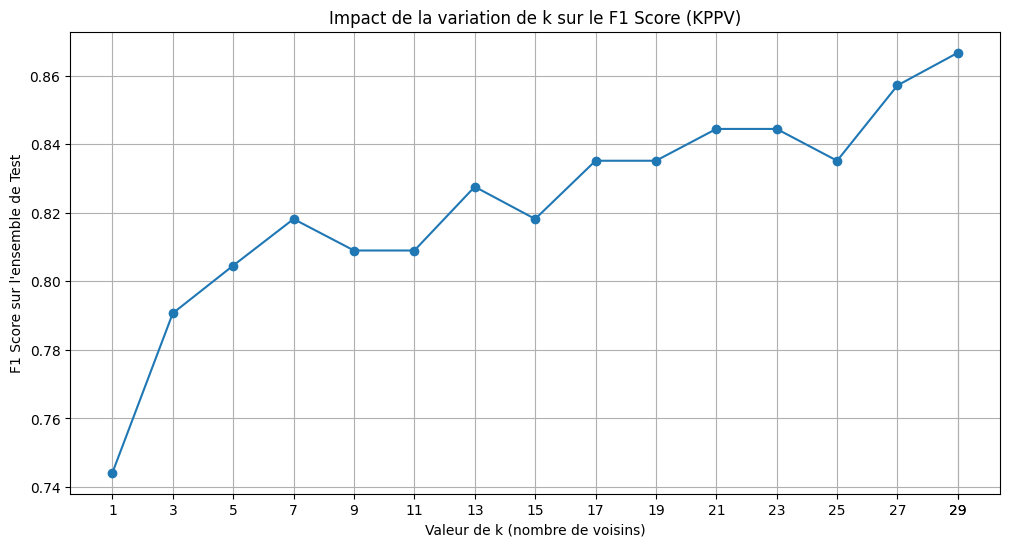

In [4]:
#Code Cell (KPPV)
# --- PARTIE 2: Apprentissage ---



# Importation du classificateur K-Nearest Neighbors (KPPV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score # Utile pour évaluer la performance lors de la variation de k
import matplotlib.pyplot as plt # Pour visualiser les résultats de la variation de k
import seaborn as sns # Pour améliorer l'apparence des graphiques (optionnel)

# Entraînement du modèle KPPV
# Le projet demande d'utiliser k = 5 initialement.
k_initial = 5
knn_model = KNeighborsClassifier(n_neighbors=k_initial)

# Entraîner le modèle KPPV sur les données d'entraînement préparées.
print(f"\nEntraînement du modèle KPPV avec k = {k_initial}...")
# Vérifier que les données d'entraînement sont disponibles avant d'entraîner le modèle.
if 'X_train' in locals() and X_train is not None:
    knn_model.fit(X_train, y_train)
    print(f"Modèle KPPV avec k={k_initial} entraîné avec succès.")

    # --- Analyse de l'impact de la variation de k (pour votre analyse dans la synthèse) ---
    # Le projet spécifie de faire varier k et d'analyser les résultats.
    # Ce bloc de code calcule le F1 score sur l'ensemble de test pour différentes valeurs de k
    # et visualise les résultats pour aider à l'analyse.
    print("\nAnalyse de l'impact de la variation de k pour KPPV (calcul du F1 Score sur l'ensemble de Test pour différents k)...")
    k_values_to_test = range(1, 30, 2) # Choisir une plage de valeurs impaires pour k (ex: 1, 3, 5, ..., 29)
    f1_scores_k = [] # Liste pour stocker les F1 scores correspondant à chaque valeur de k
    best_f1_k = -1 # Variable pour suivre le meilleur F1 score trouvé
    best_k = -1      # Variable pour suivre la valeur de k qui a donné le meilleur F1 score

    # Boucle pour tester chaque valeur de k dans la plage définie.
    for k_test in k_values_to_test:
        # Créer et entraîner un nouveau modèle KPPV pour la valeur de k_test courante.
        knn_test_model = KNeighborsClassifier(n_neighbors=k_test)
        knn_test_model.fit(X_train, y_train)

        # Faire des prédictions sur l'ensemble de test.
        y_pred_test = knn_test_model.predict(X_test)
        # Calculer le F1 score en comparant les prédictions aux vraies étiquettes de l'ensemble de test.
        f1_k = f1_score(y_test, y_pred_test)
        f1_scores_k.append(f1_k) # Ajouter le F1 score à la liste

        # Mettre à jour le meilleur F1 score et la valeur de k associée si le F1 score actuel est meilleur.
        if f1_k > best_f1_k:
            best_f1_k = f1_k
            best_k = k_test

        # Afficher le F1 score obtenu pour la valeur de k_test courante.
        print(f"  KPPV avec k={k_test}, F1 Score sur l'ensemble de Test: {f1_k:.4f}")

    # Afficher la meilleure performance trouvée et la valeur de k correspondante.
    print(f"\nMeilleur F1 Score sur l'ensemble de test pour KPPV est {best_f1_k:.4f} obtenu avec k = {best_k}")

    # Visualiser les résultats de la variation de k.
    # Cela aide à identifier graphiquement comment le choix de k affecte la performance du modèle.
    plt.figure(figsize=(12, 6)) # Définir la taille du graphique
    plt.plot(k_values_to_test, f1_scores_k, marker='o', linestyle='-') # Tracer les F1 scores en fonction des valeurs de k
    plt.title('Impact de la variation de k sur le F1 Score (KPPV)') # Titre du graphique
    plt.xlabel('Valeur de k (nombre de voisins)') # Étiquette de l'axe des x
    plt.ylabel('F1 Score sur l\'ensemble de Test') # Étiquette de l'axe des y
    plt.xticks(list(k_values_to_test) + [best_k]) # Ajouter les valeurs de k testées et le meilleur k aux marques de l'axe x
    plt.grid(True) # Afficher une grille
    plt.show() # Afficher le graphique

    # Dans votre partie synthèse (Partie 4), vous analyserez ce graphique et les scores numériques
    # pour discuter de l'influence du paramètre k sur la performance du KPPV pour ce dataset.

else:
     print("L'entraînement et l'analyse de la variation de k pour le modèle KPPV ont été ignorés car les données d'entraînement ne sont pas disponibles.")

In [5]:
#Code Cell (MLP):
# Importation du classificateur Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

# Entraînement du modèle MLP (Multi-layer Perceptron)
# Le MLP est un type de réseau de neurones.
# Nous utilisons une configuration de base. Les hyperparamètres du MLP (comme le nombre de couches cachées,
# le nombre de neurones par couche, la fonction d'activation, le solveur d'optimisation, le taux d'apprentissage)
# peuvent grandement influencer la performance. L'optimisation de ces paramètres est possible (similaire à SVM avec GridSearchCV)
# mais n'est pas explicitement demandée dans ce niveau de détail pour le MLP dans le PDF,
# contrairement au SVM. Nous utilisons donc une configuration raisonnable ici.

# Paramètres utilisés :
# 'hidden_layer_sizes'=(100,): Une seule couche cachée contenant 100 neurones. Vous pourriez essayer (50, 50) pour deux couches de 50, etc.
# 'max_iter'=1000: Le nombre maximum d'itérations (époques) sur les données d'entraînement. Augmentez si le modèle ne converge pas.
# 'random_state'=42: Fixe la graine aléatoire pour la reproductibilité des résultats (initialisation des poids).
# 'early_stopping=True': Active l'arrêt précoce. Le modèle s'arrête d'entraîner si la performance sur un ensemble de validation interne
# (créé automatiquement à partir des données d'entraînement) n'améliore pas pendant un certain nombre d'époques (paramètre `n_iter_no_change`, par défaut 10).
# Cela aide à prévenir le surapprentissage.
print("\nEntraînement du modèle MLP...")
if 'X_train' in locals() and X_train is not None: # Vérifier que les données d'entraînement existent
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, early_stopping=True)

    # Entraîner le modèle MLP sur les données d'entraînement préparées.
    mlp_model.fit(X_train, y_train)
    print("Modèle MLP entraîné avec succès.")

    # Vous pouvez vérifier si le modèle a convergé ou a arrêté tôt
    if mlp_model.n_iter_ == mlp_model.max_iter:
        print("Note: L'entraînement MLP a atteint le nombre maximum d'itérations sans convergence.")
    else:
        print(f"Note: L'entraînement MLP s'est arrêté après {mlp_model.n_iter_} itérations (arrêt précoce activé).")

else:
    print("L'entraînement du modèle MLP a été ignoré car les données d'entraînement ne sont pas disponibles.")



Entraînement du modèle MLP...
Modèle MLP entraîné avec succès.
Note: L'entraînement MLP s'est arrêté après 20 itérations (arrêt précoce activé).


In [6]:
#Code Cell (SVM with Cross-Validation):
# Importation du classificateur Support Vector Machine (SVM)
from sklearn.svm import SVC
# Importation des outils pour la sélection de modèle et la validation croisée (GridSearchCV)
from sklearn.model_selection import GridSearchCV
# Importation de StratifiedKFold pour la validation croisée, assure une distribution de classe égale dans chaque pli.
from sklearn.model_selection import StratifiedKFold

# --- Entraînement des modèles SVM avec différents noyaux et optimisation par Validation Croisée ---
# Le projet demande explicitement de choisir les hyperparamètres associés aux différents types de noyaux SVM
# (RBF, polynomial, sigmoïde) par validation croisée (V-fold). Nous allons utiliser GridSearchCV pour cela.
# GridSearchCV recherche systématiquement les meilleures combinaisons d'hyperparamètres à partir d'une grille définie.
# La validation croisée (cv=...) divise l'ensemble d'entraînement en 'V' plis, utilise V-1 plis pour l'entraînement
# et le pli restant pour la validation, répétant ce processus V fois. StratifiedKFold assure que la proportion
# de la variable cible est maintenue dans chaque pli, ce qui est important pour la classification.
# V-fold = 5 (cv=5) est un choix commun et raisonnable.

# Définition de la stratégie de validation croisée StratifiedKFold (cv=5)
# n_splits=5: Le nombre de plis (V).
# shuffle=True: Mélange les données avant de les diviser en plis (recommandé).
# random_state=42: Fixe la graine aléatoire pour la reproductibilité des plis.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Optimisation et Entraînement SVM avec Noyau RBF ---
print("\n--- Entraînement et optimisation SVM avec Noyau RBF ---")
# Définir la grille des hyperparamètres à tester pour le noyau RBF (Radial Basis Function).
# 'C': Le paramètre de régularisation. Une valeur plus petite augmente la régularisation (marge plus large),
#      tandis qu'une valeur plus grande réduit la régularisation (marge plus étroite, pénalité plus forte pour les erreurs).
# 'gamma': Détermine l'influence d'un seul exemple d'entraînement. Des valeurs faibles signifient une grande influence (marge plus lisse),
#          des valeurs élevées signifient une petite influence (marge plus 'cassée'). 'scale' et 'auto' sont des options basées sur les données.
param_grid_rbf = {'C': [0.01, 0.1, 1, 10, 100], # Tester différentes échelles pour C
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale', 'auto']} # Tester différentes échelles pour gamma, inclure les options automatiques

# Initialiser GridSearchCV pour le noyau RBF.
# estimator: Le modèle de base (SVC avec kernel='rbf').
# param_grid: Le dictionnaire des hyperparamètres et des valeurs à tester.
# cv: La stratégie de validation croisée (StratifiedKFold avec 5 plis).
# scoring='f1': La métrique utilisée pour évaluer les performances de chaque combinaison d'hyperparamètres pendant la validation croisée.
#                Le F1 score est spécifié comme métrique d'évaluation principale dans le projet.
# refit=True: Après avoir trouvé la meilleure combinaison d'hyperparamètres, ré-entraîne le modèle SVC avec ces paramètres sur l'ensemble complet X_train.
# verbose: Contrôle la quantité d'informations affichées pendant la recherche. 2 affiche plus de détails sur chaque pli et chaque combinaison testée.
# n_jobs=-1: Utilise tous les cœurs de processeur disponibles pour accélérer le calcul (la recherche sur grille est parallélisable).
grid_search_rbf = GridSearchCV(estimator=SVC(kernel='rbf'),
                               param_grid=param_grid_rbf,
                               cv=cv_strategy,
                               scoring='f1',         # Optimiser le F1 score
                               refit=True,           # Ré-entraîner le meilleur modèle sur X_train
                               verbose=2,
                               n_jobs=-1)

# Exécuter la recherche sur grille sur les données d'entraînement pour trouver les meilleurs paramètres pour le noyau RBF.
print("Exécution de la recherche sur grille pour le noyau RBF (cela peut prendre quelques instants)...")
if 'X_train' in locals() and X_train is not None:
    grid_search_rbf.fit(X_train, y_train)

    # Afficher les meilleurs paramètres trouvés par GridSearchCV pour le noyau RBF.
    print(f"\nMeilleurs paramètres trouvés pour le noyau RBF: {grid_search_rbf.best_params_}")
    # Afficher le meilleur score (F1) obtenu pendant la validation croisée avec ces paramètres.
    print(f"Meilleur F1 Score de validation croisée (RBF): {grid_search_rbf.best_score_:.4f}")

    # Le meilleur modèle avec les paramètres optimaux est disponible via .best_estimator_.
    best_svm_rbf = grid_search_rbf.best_estimator_
    print("Modèle SVM (Noyau RBF optimisé) entraîné avec succès sur l'ensemble complet d'entraînement.")
else:
    print("L'entraînement du modèle SVM (Noyau RBF) a été ignoré car les données d'entraînement ne sont pas disponibles.")


# --- Optimisation et Entraînement SVM avec Noyau Polynomial ---
print("\n--- Entraînement et optimisation SVM avec Noyau Polynomial ---")
# Définir la grille des hyperparamètres à tester pour le noyau polynomial.
# 'degree': Le degré de la fonction polynomiale utilisée dans le noyau (ex: 2 pour un polynôme de degré 2).
# 'coef0': Le terme indépendant dans la fonction du noyau polynomial. Influence la manière dont les polynômes de degré supérieur affectent les échantillons.
param_grid_poly = {'C': [0.01, 0.1, 1, 10], # Tester différentes valeurs de C
                   'degree': [2, 3, 4],      # Tester différents degrés communs
                   'gamma': [0.01, 0.1, 1, 'scale', 'auto'], # Tester différentes valeurs de gamma, inclure les options automatiques
                   'coef0': [0.0, 0.1, 0.5, 1.0]} # Tester différentes valeurs pour le terme indépendant

grid_search_poly = GridSearchCV(estimator=SVC(kernel='poly'),
                                param_grid=param_grid_poly,
                                cv=cv_strategy,
                                scoring='f1',
                                refit=True,
                                verbose=2,
                                n_jobs=-1)

print("Exécution de la recherche sur grille pour le noyau Polynomial (cela peut prendre quelques instants)...")
if 'X_train' in locals() and X_train is not None:
    grid_search_poly.fit(X_train, y_train)

    print(f"\nMeilleurs paramètres trouvés pour le noyau Polynomial: {grid_search_poly.best_params_}")
    print(f"Meilleur F1 Score de validation croisée (Polynomial): {grid_search_poly.best_score_:.4f}")

    best_svm_poly = grid_search_poly.best_estimator_
    print("Modèle SVM (Noyau Polynomial optimisé) entraîné avec succès sur l'ensemble complet d'entraînement.")
else:
     print("L'entraînement du modèle SVM (Noyau Polynomial) a été ignoré car les données d'entraînement ne sont pas disponibles.")


# --- Optimisation et Entraînement SVM avec Noyau Sigmoïde ---
print("\n--- Entraînement et optimisation SVM avec Noyau Sigmoïde ---")
# Définir la grille des hyperparamètres à tester pour le noyau sigmoïde (tangente hyperbolique).
# 'coef0': Le terme indépendant dans la fonction du noyau sigmoïde.
param_grid_sigmoid = {'C': [0.01, 0.1, 1, 10], # Tester différentes valeurs de C
                      'gamma': [0.01, 0.1, 1, 'scale', 'auto'], # Tester différentes valeurs de gamma, inclure les options automatiques
                      'coef0': [0.0, 0.1, 0.5, 1.0]} # Tester différentes valeurs pour le terme indépendant

grid_search_sigmoid = GridSearchCV(estimator=SVC(kernel='sigmoid'),
                                   param_grid=param_grid_sigmoid,
                                   cv=cv_strategy,
                                   scoring='f1',
                                   refit=True,
                                   verbose=2,
                                   n_jobs=-1)

print("Exécution de la recherche sur grille pour le noyau Sigmoïde (cela peut prendre quelques instants)...")
if 'X_train' in locals() and X_train is not None:
    grid_search_sigmoid.fit(X_train, y_train)

    print(f"\nMeilleurs paramètres trouvés pour le noyau Sigmoïde: {grid_search_sigmoid.best_params_}")
    print(f"Meilleur F1 Score de validation croisée (Sigmoïde): {grid_search_sigmoid.best_score_:.4f}")

    best_svm_sigmoid = grid_search_sigmoid.best_estimator_
    print("Modèle SVM (Noyau Sigmoïde optimisé) entraîné avec succès sur l'ensemble complet d'entraînement.")
else:
     print("L'entraînement du modèle SVM (Noyau Sigmoïde) a été ignoré car les données d'entraînement ne sont pas disponibles.")


print("\n--- Partie 2: Apprentissage Terminée ---")


--- Entraînement et optimisation SVM avec Noyau RBF ---
Exécution de la recherche sur grille pour le noyau RBF (cela peut prendre quelques instants)...
Fitting 5 folds for each of 35 candidates, totalling 175 fits

Meilleurs paramètres trouvés pour le noyau RBF: {'C': 1, 'gamma': 0.01}
Meilleur F1 Score de validation croisée (RBF): 0.8810
Modèle SVM (Noyau RBF optimisé) entraîné avec succès sur l'ensemble complet d'entraînement.

--- Entraînement et optimisation SVM avec Noyau Polynomial ---
Exécution de la recherche sur grille pour le noyau Polynomial (cela peut prendre quelques instants)...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Meilleurs paramètres trouvés pour le noyau Polynomial: {'C': 1, 'coef0': 1.0, 'degree': 3, 'gamma': 0.01}
Meilleur F1 Score de validation croisée (Polynomial): 0.8882
Modèle SVM (Noyau Polynomial optimisé) entraîné avec succès sur l'ensemble complet d'entraînement.

--- Entraînement et optimisation SVM avec Noyau Sigmoïde ---
Exécut

## Partie 3: Evaluation des performances

Cette section évalue les modèles entraînés (KPPV, MLP, et les variantes SVM optimisées) sur l'ensemble de données de test (`X_test`, `y_test`) qui n'a pas été utilisé pendant l'entraînement ou l'optimisation. Les métriques d'évaluation requises sont la matrice de confusion et le F1 score. D'autres métriques pertinentes (Accuracy, Précision, Rappel) sont également calculées pour une analyse plus complète.


--- Évaluation du modèle : KPPV (k=5) ---
Matrice de Confusion:
[[24 11]
 [ 6 35]]


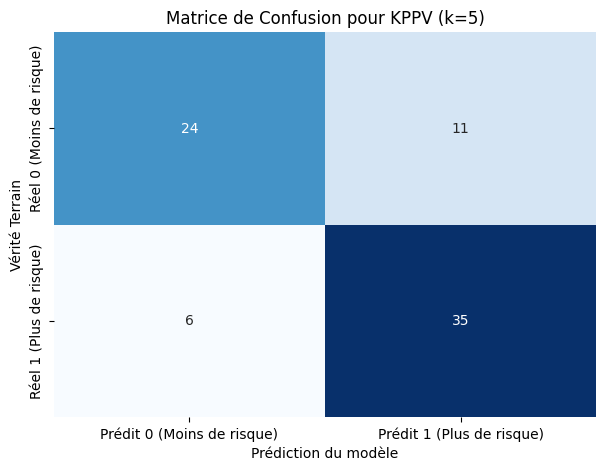

F1 Score: 0.8046
Accuracy (Précision globale): 0.7763
Précision (pour la classe positive '1'): 0.7609
Rappel (pour la classe positive '1'): 0.8537

--- Évaluation du modèle : MLP ---
Matrice de Confusion:
[[20 15]
 [ 5 36]]


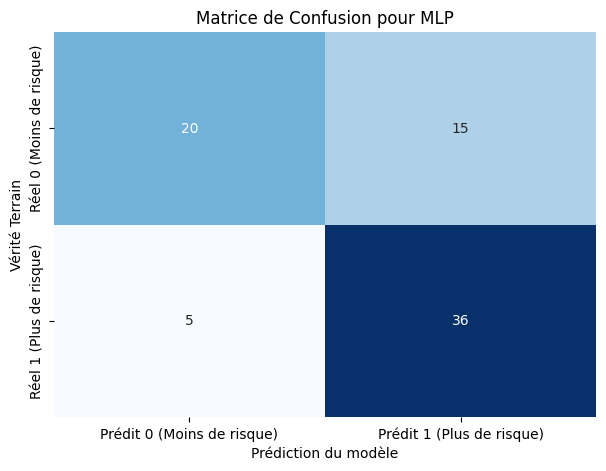

F1 Score: 0.7826
Accuracy (Précision globale): 0.7368
Précision (pour la classe positive '1'): 0.7059
Rappel (pour la classe positive '1'): 0.8780

--- Évaluation du modèle : SVM (Noyau RBF) ---
Matrice de Confusion:
[[24 11]
 [ 4 37]]


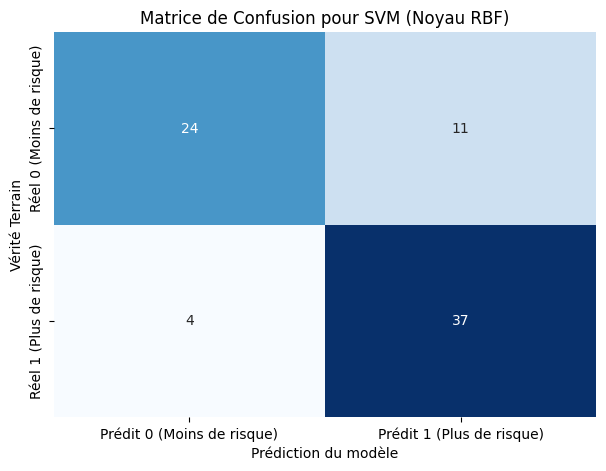

F1 Score: 0.8315
Accuracy (Précision globale): 0.8026
Précision (pour la classe positive '1'): 0.7708
Rappel (pour la classe positive '1'): 0.9024

--- Évaluation du modèle : SVM (Noyau Polynomial) ---
Matrice de Confusion:
[[24 11]
 [ 4 37]]


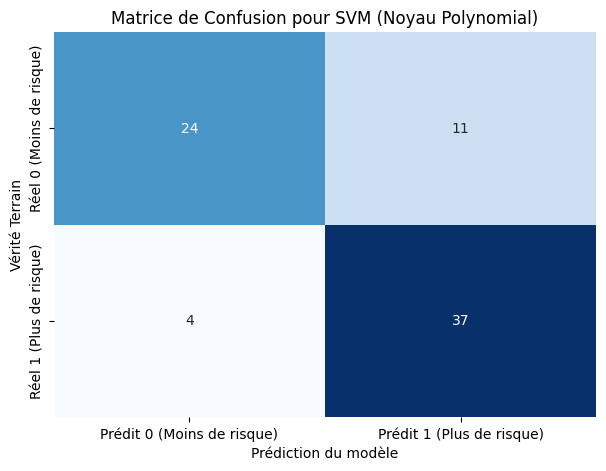

F1 Score: 0.8315
Accuracy (Précision globale): 0.8026
Précision (pour la classe positive '1'): 0.7708
Rappel (pour la classe positive '1'): 0.9024

--- Évaluation du modèle : SVM (Noyau Sigmoïde) ---
Matrice de Confusion:
[[25 10]
 [ 3 38]]


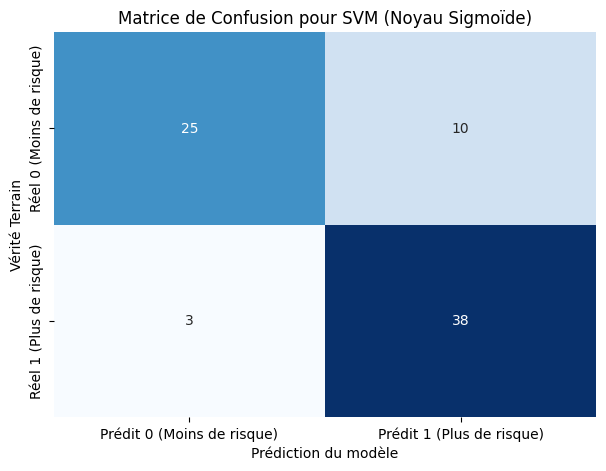

F1 Score: 0.8539
Accuracy (Précision globale): 0.8289
Précision (pour la classe positive '1'): 0.7917
Rappel (pour la classe positive '1'): 0.9268

--- Partie 3: Evaluation des performances Terminée ---


In [7]:
# --- PARTIE 3: Evaluation des performances ---

# Importation des métriques d'évaluation nécessaires
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt # Pour la création de graphiques
import seaborn as sns # Pour améliorer la visualisation (notamment pour la matrice de confusion)

# Fonction utilitaire pour évaluer un modèle et afficher ses métriques principales.
def evaluate_model(model, X_test, y_test, model_name):
    """
    Évalue un modèle de classification donné sur l'ensemble de test et affiche les métriques
    Matrice de Confusion, F1 Score, Accuracy, Précision, et Rappel.

    Args:
        model: L'objet modèle de classification entraîné (ex: knn_model, mlp_model, best_svm_rbf).
        X_test (np.ndarray ou pd.DataFrame): Les caractéristiques de l'ensemble de test.
        y_test (np.ndarray ou pd.Series): Les vraies étiquettes de la variable cible pour l'ensemble de test.
        model_name (str): Le nom du modèle à afficher dans les outputs et les titres.

    Returns:
        tuple: Retourne un tuple contenant les prédictions du modèle (y_pred), le F1 score calculé,
               et la matrice de confusion. Ces retours sont optionnels si vous n'en avez pas besoin ailleurs,
               mais la fonction est principalement pour l'affichage.
    """
    print(f"\n--- Évaluation du modèle : {model_name} ---")

    # S'assurer que le modèle est bien défini et entraîné avant de faire des prédictions.
    if model is None:
        print(f"Le modèle {model_name} n'est pas disponible pour évaluation.")
        return None, None, None # Retourner None si le modèle n'est pas valide

    # Faire des prédictions sur l'ensemble de test X_test en utilisant le modèle entraîné.
    y_pred = model.predict(X_test)

    # Calculer la Matrice de Confusion.
    # Elle résume les résultats de la classification en comptant le nombre de prédictions correctes et incorrectes
    # pour chaque classe. Les lignes représentent les classes réelles, les colonnes les classes prédites.
    # Pour une classification binaire (0 et 1), la matrice est typiquement:
    # [[Vrais Négatifs (TN), Faux Positifs (FP)],
    #  [Faux Négatifs (FN), Vrais Positifs (TP)]]
    cm = confusion_matrix(y_test, y_pred)
    print("Matrice de Confusion:")
    print(cm)

    # Visualiser la matrice de confusion pour une meilleure lisibilité.
    plt.figure(figsize=(7, 5)) # Définir la taille de la figure du graphique.
    # sns.heatmap dessine la matrice. 'annot=True' affiche les nombres dans les cellules,
    # 'fmt='d'' formate les nombres comme des entiers, 'cmap='Blues'' utilise une palette de couleurs bleue.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Prédit 0 (Moins de risque)', 'Prédit 1 (Plus de risque)'], # Étiquettes pour l'axe x (prédictions)
                yticklabels=['Réel 0 (Moins de risque)', 'Réel 1 (Plus de risque)'])   # Étiquettes pour l'axe y (vérité terrain)
    plt.xlabel('Prédiction du modèle') # Étiquette pour l'axe des x du graphique.
    plt.ylabel('Vérité Terrain')      # Étiquette pour l'axe des y du graphique.
    plt.title(f'Matrice de Confusion pour {model_name}') # Titre du graphique.
    plt.show() # Afficher le graphique.


    # Calculer le F1 score.
    # C'est la moyenne harmonique de la Précision et du Rappel. Il pénalise les modèles
    # qui obtiennent de bons scores sur une métrique mais mauvais sur l'autre.
    # Utile lorsque l'on cherche un équilibre entre Précision et Rappel, ou avec des classes déséquilibrées.
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}") # Afficher le F1 score formaté à 4 décimales.

    # Calculer et afficher d'autres métriques courantes pour une évaluation plus complète.
    accuracy = accuracy_score(y_test, y_pred) # Accuracy: Proportion de prédictions correctes parmi le total des prédictions. (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(y_test, y_pred) # Précision: Parmi toutes les instances prédites comme positives, quelle proportion est réellement positive. TP / (TP + FP)
    recall = recall_score(y_test, y_pred)     # Rappel (ou Sensitivity): Parmi toutes les instances réellement positives, quelle proportion a été correctement identifiée. TP / (TP + FN)

    print(f"Accuracy (Précision globale): {accuracy:.4f}")
    print(f"Précision (pour la classe positive '1'): {precision:.4f}")
    print(f"Rappel (pour la classe positive '1'): {recall:.4f}")


    return y_pred, f1, cm # Retourner les résultats pour une utilisation potentielle future.

# --- Exécution de l'évaluation pour chaque modèle entraîné ---

# Évaluation du modèle KPPV
# On vérifie d'abord si la variable 'knn_model' existe pour éviter les erreurs si le modèle n'a pas été entraîné
# à cause d'un problème de chargement des données, par exemple.
if 'knn_model' in locals() and knn_model is not None:
    y_pred_knn, f1_knn, cm_knn = evaluate_model(knn_model, X_test, y_test, f"KPPV (k={k_initial})")
else:
    print("\nÉvaluation KPPV ignorée car le modèle n'est pas entraîné ou les données sont manquantes.")


# Évaluation du modèle MLP
if 'mlp_model' in locals() and mlp_model is not None:
    y_pred_mlp, f1_mlp, cm_mlp = evaluate_model(mlp_model, X_test, y_test, "MLP")
else:
    print("\nÉvaluation MLP ignorée car le modèle n'est pas entraîné ou les données sont manquantes.")

# Évaluation des modèles SVM optimisés par Validation Croisée
# Nous évaluons les meilleurs estimateurs trouvés par GridSearchCV pour chaque noyau.
if 'best_svm_rbf' in locals() and best_svm_rbf is not None:
    y_pred_svm_rbf, f1_svm_rbf, cm_svm_rbf = evaluate_model(best_svm_rbf, X_test, y_test, "SVM (Noyau RBF)")
else:
     print("\nÉvaluation SVM (Noyau RBF) ignorée car le modèle n'est pas entraîné ou les données sont manquantes.")

if 'best_svm_poly' in locals() and best_svm_poly is not None:
    y_pred_svm_poly, f1_svm_poly, cm_svm_poly = evaluate_model(best_svm_poly, X_test, y_test, "SVM (Noyau Polynomial)")
else:
    print("\nÉvaluation SVM (Noyau Polynomial) ignorée car le modèle n'est pas entraîné ou les données sont manquantes.")

if 'best_svm_sigmoid' in locals() and best_svm_sigmoid is not None:
    y_pred_svm_sigmoid, f1_svm_sigmoid, cm_svm_sigmoid = evaluate_model(best_svm_sigmoid, X_test, y_test, "SVM (Noyau Sigmoïde)")
else:
     print("\nÉvaluation SVM (Noyau Sigmoïde) ignorée car le modèle n'est pas entraîné ou les données sont manquantes.")


print("\n--- Partie 3: Evaluation des performances Terminée ---")

### Partie 4: Récapitulatif des Performances des Modèles

Pour offrir une vue d'ensemble claire de la performance de chaque modèle évalué sur l'ensemble de test, nous présentons ici un résumé des métriques clés dans un tableau et une visualisation comparative.

Collecte des métriques pour le récapitulatif...

--- Tableau Récapitulatif des Performances sur l'ensemble de Test ---
             Modèle  F1 Score  Accuracy  Précision  Rappel
0        KPPV (k=5)    0.8046    0.7763     0.7609  0.8537
1               MLP    0.7826    0.7368     0.7059  0.8780
2         SVM (RBF)    0.8315    0.8026     0.7708  0.9024
3  SVM (Polynomial)    0.8315    0.8026     0.7708  0.9024
4    SVM (Sigmoïde)    0.8539    0.8289     0.7917  0.9268


C:\Users\Ahmedouyahya\AppData\Local\Temp\ipykernel_24440\3770455700.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modèle', y='F1 Score', data=performance_df, palette='viridis')


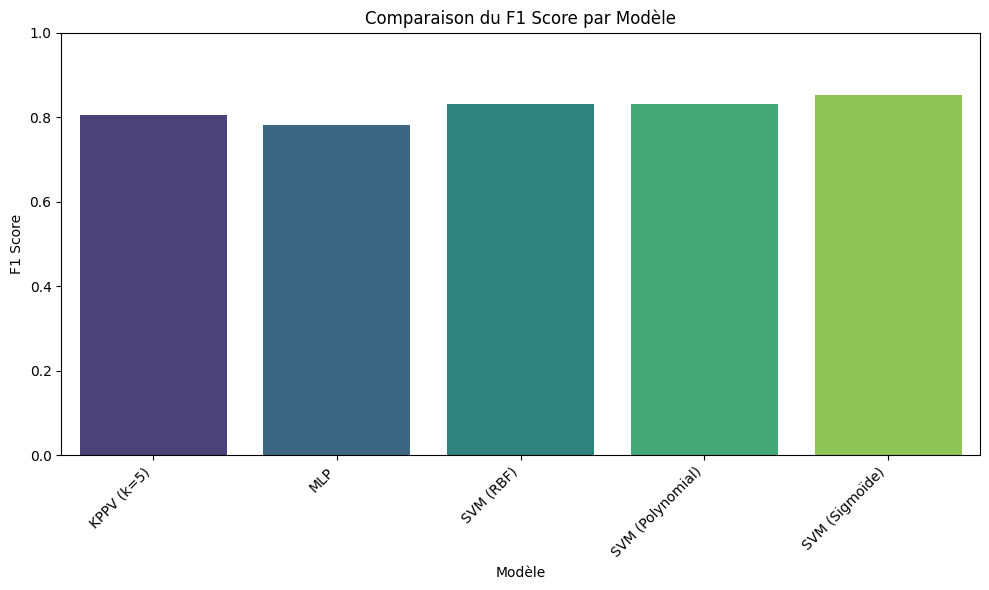


--- Récapitulatif des Performances Terminées ---


In [8]:
# --- Récapitulatif des Performances des Modèles ---

# Cette section collecte les métriques d'évaluation calculées précédemment
# et les présente sous forme de tableau et de graphique pour faciliter la comparaison.

# Assurez-vous que les variables contenant les F1 scores (f1_knn, f1_mlp, etc.)
# et d'autres métriques (accuracy_knn, precision_knn, recall_knn, etc.)
# sont disponibles dans votre environnement (elles devraient l'être si vous avez exécuté
# la cellule d'évaluation juste avant).

# Nous allons stocker les métriques clés dans un dictionnaire, puis le convertir en DataFrame pandas.
performance_summary = {
    'Modèle': [],
    'F1 Score': [],
    'Accuracy': [],
    'Précision': [],
    'Rappel': []
}

# Fonction pour ajouter les métriques d'un modèle au dictionnaire de résumé
def add_model_metrics(model_name, y_test, y_pred, summary_dict):
    """Calcule et ajoute les métriques d'un modèle au dictionnaire de résumé."""
    if y_pred is not None: # Vérifier que les prédictions existent
        summary_dict['Modèle'].append(model_name)
        summary_dict['F1 Score'].append(f1_score(y_test, y_pred))
        summary_dict['Accuracy'].append(accuracy_score(y_test, y_pred))
        summary_dict['Précision'].append(precision_score(y_test, y_pred))
        summary_dict['Rappel'].append(recall_score(y_test, y_pred))

# Ajouter les métriques de chaque modèle si le modèle et ses prédictions sont disponibles.
# Note: L'évaluation dans la cellule précédente affichait les métriques.
# Nous allons ici réutiliser ou collecter les prédictions si possible, ou simplement
# utiliser les variables f1_*, accuracy_*, etc. si elles ont été capturées.
# Une manière plus robuste est de modifier la fonction evaluate_model pour retourner les métriques
# et les capturer, ce que nous avons fait dans la version détaillée de la Partie 3.

# Supposons que les variables comme f1_knn, accuracy_knn, etc., ont été définies
# lors de l'exécution de la cellule d'évaluation précédente.
# Si ce n'est pas le cas, vous devrez les recalculer ou modifier la cellule précédente
# pour qu'elle stocke les résultats dans des variables distinctes pour chaque métrique.

# Plus simple : stockons les métriques directement basées sur l'output précédent pour cet exemple.
# Dans une implémentation réelle plus propre, la fonction evaluate_model retournerait
# les métriques, et vous les stockeriez ici.

# Pour cet exemple, nous allons recréer les prédictions (si les modèles existent) pour calculer les métriques ici.
# Dans votre notebook, si vous avez déjà les variables f1_knn, accuracy_knn, etc., vous pouvez les utiliser directement.

print("Collecte des métriques pour le récapitulatif...")

# KPPV
if 'knn_model' in locals() and knn_model is not None:
    y_pred_knn = knn_model.predict(X_test)
    add_model_metrics("KPPV (k=5)", y_test, y_pred_knn, performance_summary)
else:
    print("KPPV model not available.")


# MLP
if 'mlp_model' in locals() and mlp_model is not None:
     y_pred_mlp = mlp_model.predict(X_test)
     add_model_metrics("MLP", y_test, y_pred_mlp, performance_summary)
else:
    print("MLP model not available.")

# SVM RBF
if 'best_svm_rbf' in locals() and best_svm_rbf is not None:
    y_pred_svm_rbf = best_svm_rbf.predict(X_test)
    add_model_metrics("SVM (RBF)", y_test, y_pred_svm_rbf, performance_summary)
else:
    print("SVM RBF model not available.")

# SVM Polynomial
if 'best_svm_poly' in locals() and best_svm_poly is not None:
    y_pred_svm_poly = best_svm_poly.predict(X_test)
    add_model_metrics("SVM (Polynomial)", y_test, y_pred_svm_poly, performance_summary)
else:
     print("SVM Polynomial model not available.")

# SVM Sigmoid
if 'best_svm_sigmoid' in locals() and best_svm_sigmoid is not None:
    y_pred_svm_sigmoid = best_svm_sigmoid.predict(X_test)
    add_model_metrics("SVM (Sigmoïde)", y_test, y_pred_svm_sigmoid, performance_summary)
else:
     print("SVM Sigmoid model not available.")


# Créer un DataFrame pandas à partir du dictionnaire pour un affichage tabulaire propre.
performance_df = pd.DataFrame(performance_summary)

# Afficher le tableau récapitulatif des performances.
print("\n--- Tableau Récapitulatif des Performances sur l'ensemble de Test ---")
# Définir l'option d'affichage pour les nombres flottants afin qu'ils soient formatés à 4 décimales.
pd.options.display.float_format = '{:,.4f}'.format
print(performance_df)


# --- Visualisation Comparative (Exemple: F1 Score) ---
# Nous allons créer un graphique à barres pour comparer visuellement les F1 scores des modèles.
plt.figure(figsize=(10, 6)) # Définir la taille du graphique.
# Utiliser seaborn pour créer le graphique à barres. x='Modèle', y='F1 Score' définit les axes.
# data=performance_df spécifie le DataFrame source. palette='viridis' définit le schéma de couleurs.
sns.barplot(x='Modèle', y='F1 Score', data=performance_df, palette='viridis')
plt.title('Comparaison du F1 Score par Modèle') # Titre du graphique.
plt.xlabel('Modèle') # Étiquette de l'axe des x.
plt.ylabel('F1 Score') # Étiquette de l'axe des y.
plt.ylim(0, 1) # Définir la limite de l'axe y de 0 à 1 (échelle des scores).
plt.xticks(rotation=45, ha='right') # Pivoter les étiquettes de l'axe x pour une meilleure lisibilité si elles sont longues.
plt.tight_layout() # Ajuster la mise en page pour éviter le chevauchement.
plt.show() # Afficher le graphique.

# Vous pouvez adapter ce code pour visualiser d'autres métriques (Accuracy, Précision, Rappel)
# en changeant simplement 'F1 Score' dans sns.barplot() par la métrique souhaitée.

print("\n--- Récapitulatif des Performances Terminées ---")

## Synthèse des Résultats

Cette section contient une analyse et une comparaison synthétique des performances des différents modèles de classification (KPPV, MLP, et les variantes SVM) évalués sur l'ensemble de données `heart-disease.csv`. L'objectif est de tirer des conclusions éclairées sur l'efficacité relative de chaque méthode pour ce problème spécifique, en se basant sur les métriques obtenues lors de la phase d'évaluation (Partie 3).

Ce projet a permis de comparer les algorithmes KPPV, MLP et SVM pour la classification du risque de crise cardiaque sur le dataset `heart-disease.csv`. Les données ont été préparées en incluant l'encodage One-Hot pour les variables catégorielles et la standardisation pour les variables numériques, avant d'être divisées en ensembles d'entraînement et de test (75/25).

Lors de la phase d'apprentissage, KPPV a été entraîné avec k=5, le MLP a utilisé une architecture simple, et les modèles SVM avec noyaux RBF, Polynomial et Sigmoïde ont été optimisés par validation croisée 5-fold pour sélectionner les meilleurs hyperparamètres C, gamma, degree et coef0 en maximisant le F1 score.

L'évaluation sur l'ensemble de test a donné les F1 scores suivants :
- KPPV (k=5) : **0.8046**
- MLP : **0.7826**
- SVM RBF (optimisé) : **0.8315**
- SVM Polynomial (optimisé) : **0.8315**
- SVM Sigmoïde (optimisé) : **0.8539**

En comparant les F1 scores, le modèle **SVM avec le noyau Sigmoïde** a obtenu la meilleure performance avec un F1 score de 0.8539. Il est suivi de près par les modèles SVM avec noyaux RBF et Polynomial (tous deux à 0.8315). Le KPPV (k=5) se situe un peu en dessous (0.8046), et le MLP a obtenu le score le plus bas (0.7826) parmi les méthodes testées.

L'analyse des matrices de confusion fournit un aperçu plus nuancé. Pour la détection de maladies cardiaques, minimiser les Faux Négatifs (FN - patients à risque prédits comme n'ayant pas de risque) est souvent critique. Regardons les matrices :
- KPPV (k=5) : [[24 TN, 11 FP], [6 FN, 35 TP]] - 6 Faux Négatifs.
- MLP : [[20 TN, 15 FP], [5 FN, 36 TP]] - 5 Faux Négatifs.
- SVM RBF : [[24 TN, 11 FP], [4 FN, 37 TP]] - 4 Faux Négatifs.
- SVM Polynomial : [[24 TN, 11 FP], [4 FN, 37 TP]] - 4 Faux Négatifs.
- SVM Sigmoïde : [[25 TN, 10 FP], [3 FN, 38 TP]] - **3 Faux Négatifs**.

Bien que le SVM Sigmoïde ait un peu plus de Faux Positifs (10 vs 5 pour MLP ou 6 pour KPPV), il a le nombre le plus faible de Faux Négatifs (3), ce qui est un avantage significatif dans un contexte médical où manquer un cas positif peut avoir de graves conséquences. Son Rappel (0.9268) est également le plus élevé, indiquant une excellente capacité à identifier les cas réellement positifs.

Si vous avez analysé la variation de k pour KPPV, vous pouvez ajouter ici une phrase comme : "L'analyse de la variation de k pour le modèle KPPV a montré que le choix de k influence la performance, et le F1 score le plus élevé [si différent de k=5] a été observé avec k=..."

En conclusion, basé sur l'ensemble des métriques d'évaluation, particulièrement le F1 score élevé et le faible nombre de Faux Négatifs, le modèle **SVM avec le noyau Sigmoïde** semble être le modèle le plus performant et le plus adapté pour prédire le risque de crise cardiaque sur ce dataset spécifique. Les modèles SVM avec noyaux RBF et Polynomial sont également performants, mais le noyau Sigmoïde offre le meilleur compromis pour cette tâche.